In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_excel(r"C:\Users\odhiambo rodgers bon\Documents\hospital_data.xlsx")
print(df.head(10))

    VisitCode    PatientCode       VisitDateTime MedicalCenter  \
0  XA-1124501  38af25ef-37a9 2022-05-22 08:51:05        Tassia   
1  XA-1220993  15ac7a77-8153 2022-09-07 10:56:49        Tassia   
2  XA-1079995  173f581e-c323 2022-03-24 17:17:32        Tassia   
3  XA-1188078  c464fa34-e7f2 2022-07-27 05:54:02        Tassia   
4  XA-1220192  7b8216fe-ff14 2022-09-06 12:28:24        Tassia   
5  XA-1155744  6c9e65f2-38d3 2022-06-20 10:54:27        Tassia   
6  XA-1222176  7d456b69-494d 2022-09-08 16:57:00        Tassia   
7  XA-1120632  ae928861-7de6 2022-05-17 20:37:25        Tassia   
8  XA-1231062  23fcee1f-9b86 2022-09-19 11:58:57        Tassia   
9  XA-1146859  758bee68-b569 2022-06-12 16:41:30        Tassia   

     VisitCategory Payor  NPS Score  Amount  \
0  In-person Visit  Cash        NaN     195   
1  In-person Visit  Cash        NaN     195   
2  In-person Visit  Cash        NaN     195   
3  In-person Visit  Cash        NaN     195   
4  In-person Visit  Cash        NaN   

In [10]:
#checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

VisitCode            0
PatientCode          0
VisitDateTime        0
MedicalCenter        0
VisitCategory        0
Payor                0
NPS Score        43298
Amount               0
Diagnosis        23366
dtype: int64


In [11]:
df.shape

(45226, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45226 entries, 0 to 45225
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   VisitCode      45226 non-null  object        
 1   PatientCode    45226 non-null  object        
 2   VisitDateTime  45226 non-null  datetime64[ns]
 3   MedicalCenter  45226 non-null  object        
 4   VisitCategory  45226 non-null  object        
 5   Payor          45226 non-null  object        
 6   NPS Score      1928 non-null   float64       
 7   Amount         45226 non-null  int64         
 8   Diagnosis      21860 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 3.1+ MB


In [16]:
data_types = df.dtypes
print(data_types)


VisitCode                object
PatientCode              object
VisitDateTime    datetime64[ns]
MedicalCenter            object
VisitCategory            object
Payor                    object
NPS Score               float64
Amount                    int64
Diagnosis                object
dtype: object


In [18]:
df.dropna(inplace=True)


In [20]:
print(df.head(100))

       VisitCode    PatientCode       VisitDateTime MedicalCenter  \
6     XA-1222176  7d456b69-494d 2022-09-08 16:57:00        Tassia   
11    XA-1204110  1c570cd7-0b55 2022-08-16 13:34:48        Tassia   
24    XA-1171920  3b1acf04-ee4b 2022-07-06 19:33:50        Tassia   
62    XA-1160190  4d82da46-ed7b 2022-06-24 12:59:12        Tassia   
167   XA-1099676  1802f331-cb91 2022-04-21 21:02:20        Tassia   
...          ...            ...                 ...           ...   
3975  XA-1205008  2cb2ac07-de7b 2022-08-17 15:04:17        Tassia   
4013  XA-1190846  ab34a311-e16a 2022-07-30 11:24:36        Tassia   
4037  XA-1123349  b5f08511-8e01 2022-05-20 23:09:02        Tassia   
4067  XA-1145921  fe8d751f-3cf3 2022-06-11 18:24:35        Tassia   
4077  XA-1259515  12dd4f81-4ce7 2022-10-20 13:55:23        Tassia   

        VisitCategory Payor  NPS Score  Amount  \
6     In-person Visit  Cash        9.0     195   
11    In-person Visit  Cash        8.0     195   
24    In-person Visit

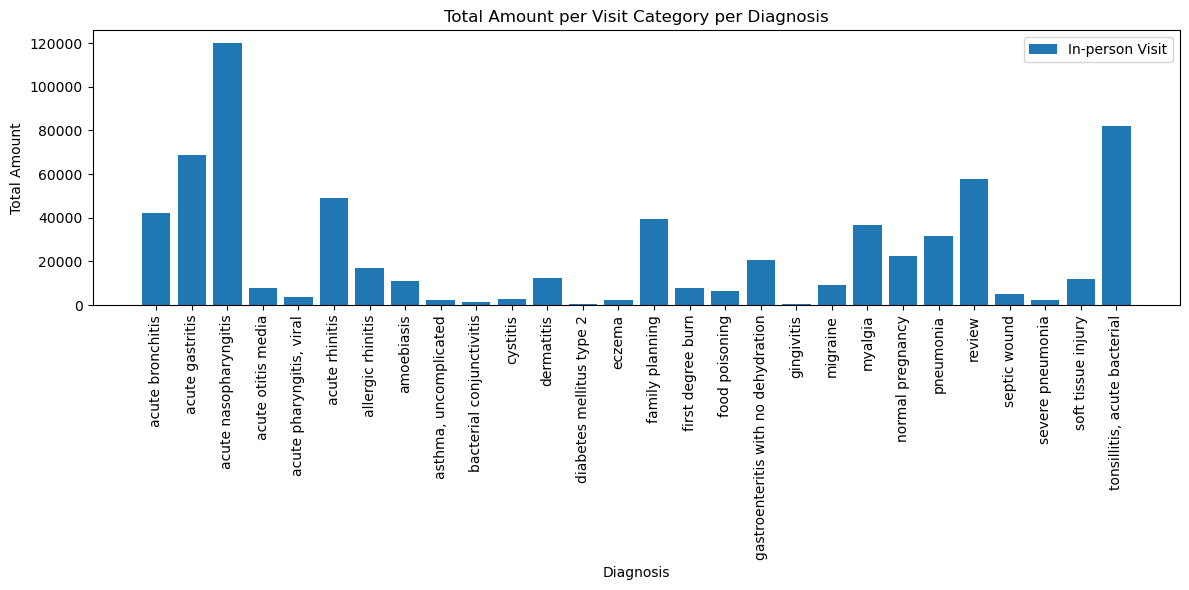

In [26]:
# Group the data by 'VisitCategory' and 'Diagnosis' and calculate the sum of 'Amount'
grouped = df.groupby(['VisitCategory', 'Diagnosis'])['Amount'].sum().reset_index()

# Create a bar graph
plt.figure(figsize=(12, 6))
for visit_category in grouped['VisitCategory'].unique():
    subset = grouped[grouped['VisitCategory'] == visit_category]
    plt.bar(subset['Diagnosis'], subset['Amount'], label=visit_category)

plt.title('Total Amount per Visit Category per Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the chart
plt.show()
